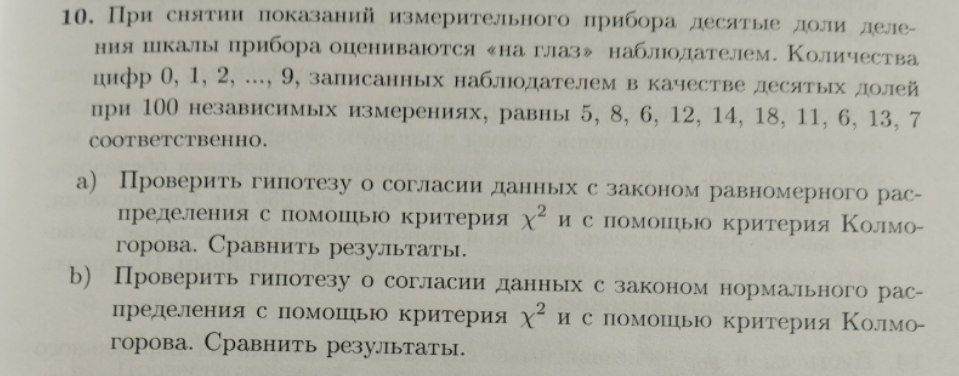

In [1]:
from IPython.display import Image

Image("images/task_10.jpg")

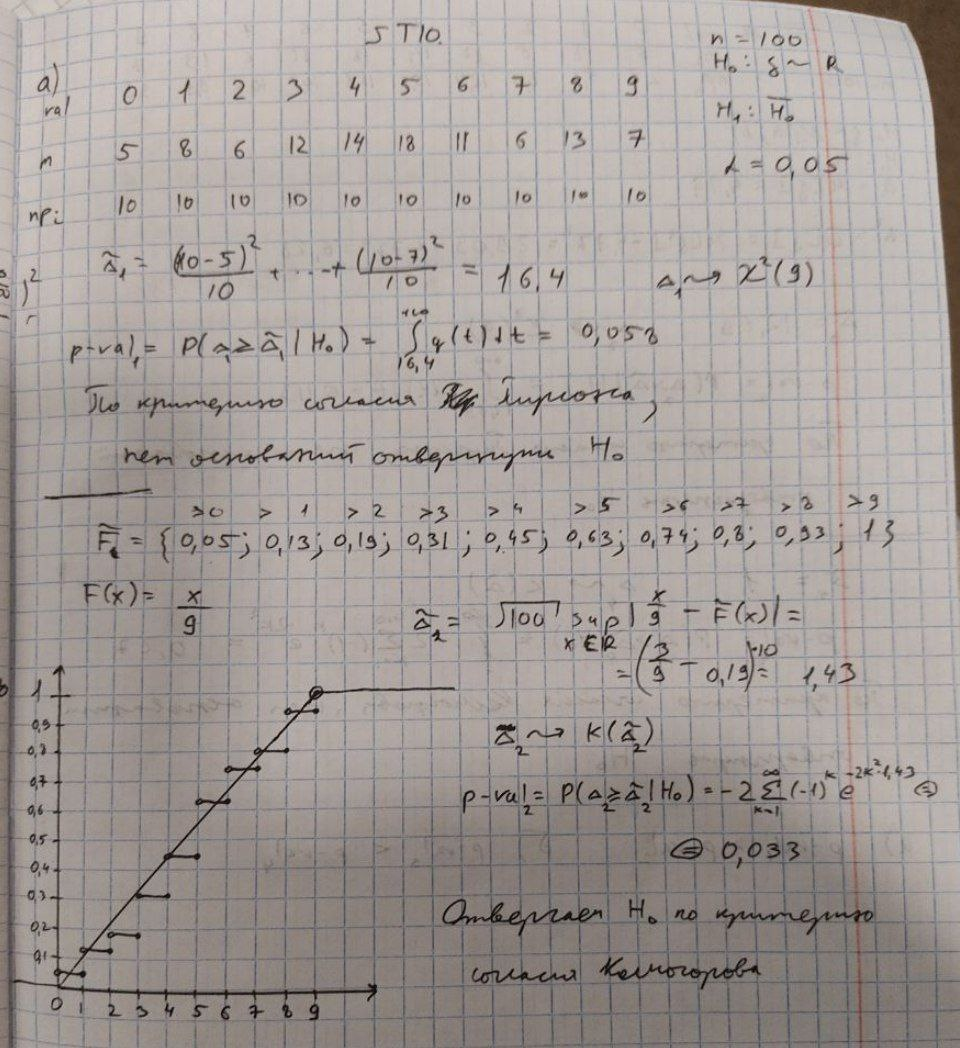

In [2]:
Image("images/answer_10_1.jpg")